In [1]:
import netCDF4
import numpy
import math
from pyhdf.SD import SD
import pickle
import matplotlib.pyplot as plt
import shapely
import geopandas

import sys
sys.path.insert(0, '../') 
import sphereGIS 

In [2]:
fname = '../data/MOD09.A2020032.1940.006.2020034015024.hdf'
hdf = SD(fname)
lat = hdf.select('Latitude').get().flatten()
lon = hdf.select('Longitude').get().flatten()

In [3]:
x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
z = numpy.sin(lat/360*math.pi*2)

fov = numpy.array([x, y, z]).transpose()
fov.shape

(2748620, 3)

In [4]:
with open('sb_gc.pickle', 'rb') as out:
    convex_hull_gc = numpy.array(pickle.load(out))
convex_hull_gc.shape

(23, 3)

In [5]:
# m dimension are the great circle constraints
dots = numpy.einsum('ji,mi->jm', fov, convex_hull_gc)

In [6]:
n_constraints = len(convex_hull_gc)
j = numpy.where(numpy.sum(dots>0, axis=1)==n_constraints)[0]

In [7]:
points = []
for j_i in j:
    points.append(shapely.geometry.Point(lon[j_i], lat[j_i]))
points = geopandas.GeoDataFrame({'geom': points}).set_geometry('geom')

# Visualization

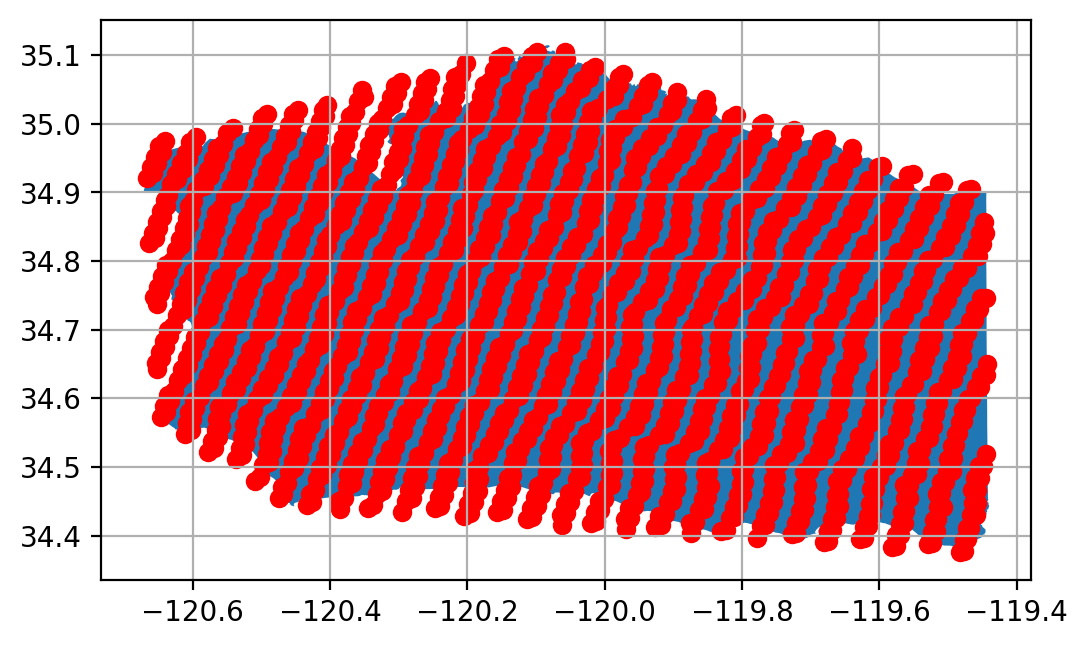

In [8]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

polygons = geopandas.read_file('../data/santa_barbara.gpkg')
polygons.plot(ax=ax)
points.plot(ax=ax, color='r')

# Swig

In [9]:
#sphereGIS.intersects()
x = numpy.array(convex_hull_gc.transpose()[0])
y = convex_hull_gc.transpose()[1]
z = convex_hull_gc.transpose()[2]

In [10]:
inside = sphereGIS.intersects_convex(lon.flatten(), lat.flatten(), x, y, z)

NameError: name '_intersects' is not defined

In [ ]:
points = []
for lon_i, lat_i in zip(lon.flatten()[inside], lat.flatten()[inside]):
    points.append(shapely.geometry.Point((lon_i, lat_i)))
points = geopandas.GeoDataFrame({'geom': points}).set_geometry('geom')

In [ ]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

points.plot(ax=ax, color='r')